In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = {
    'Humidity': [70, 65, 80, 75, 60, 55, 85, 90, 50, 40],
    'WindSpeed': [12, 14, 9, 10, 15, 18, 8, 6, 20, 25],
    'Pressure': [1012, 1013, 1011, 1010, 1015, 1018, 1009, 1008, 1019, 1020],
    'Temperature': [30, 32, 28, 29, 35, 36, 27, 26, 38, 40]
}

df = pd.DataFrame(data)
print(df)

   Humidity  WindSpeed  Pressure  Temperature
0        70         12      1012           30
1        65         14      1013           32
2        80          9      1011           28
3        75         10      1010           29
4        60         15      1015           35
5        55         18      1018           36
6        85          8      1009           27
7        90          6      1008           26
8        50         20      1019           38
9        40         25      1020           40


In [3]:
X = df[['Humidity', 'WindSpeed', 'Pressure']]
y = df['Temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

In [5]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 2))

Mean Squared Error: 0.11
R² Score: 0.98


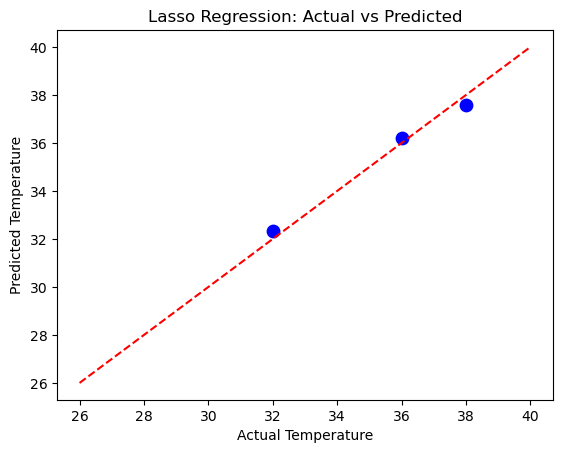

In [6]:
plt.scatter(y_test, y_pred, color='blue', s=80)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Lasso Regression: Actual vs Predicted')
plt.show()

In [7]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
print(coef_df)

     Feature  Coefficient
0   Humidity    -0.204114
1  WindSpeed     0.000000
2   Pressure     0.365428
